### Approximating Sine Function with a Third-Order Polynomial Using PyTorch's Optimizer

In the realm of machine learning, approximating complex functions with simpler models is a foundational technique. This study explores the approximation of the sine function, \( y = \sin(x) \), over the interval \(-\pi\) to \(\pi\) using a third-order polynomial. The goal is to minimize the squared Euclidean distance between the polynomial's output and the true sine values. Leveraging PyTorch's nn and optim packages, this implementation automates the weight adjustment process, enhancing efficiency and accuracy. The optim package provides a suite of optimization algorithms commonly employed in deep learning, such as SGD with momentum, RMSProp, and Adam, enabling streamlined and effective model training. This approach not only simplifies the process of function approximation but also demonstrates the power of automatic differentiation and optimization in modern machine learning frameworks.

In [1]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [2]:
learning_rate = 1e-3
# This line sets the learning rate for the optimizer, which determines the steps size during the weight upadates.A smaller learning rate means smaller steps, which can help in achieving a more precise convergence.
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# Here, we initialize an optimizer using the RMSProp algorithm, a popular choice for training neural networks. The model.parameters() function provides the optimizer with the parameters (weights) of the model that need to be updated.  
for t in range(2000):
    # This loop runs the training process for 2000 iterations. Each iteration represents one update step of the model's parameters.
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # The loss is computed by comparing the model's predictions(y_pred) with the actual target values(y).loss_fn is a function that calculates the loss, typically mean squared error for regression tasks.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before computing the gradients for the backward pass, this line resets the gradients of all parameters. PyTorch accumulates gradients by default, so this step ensures that the gradients are cleared before each new backward pass.

    optimizer.zero_grad()
    # This line computes the gradients of the loss with respect to each parameter of the model using backpropagation. These gradients are stored in the parameters' .grad attribute.
    loss.backward()
    # The optimizer updates the model's parameters using the computed gradients. This step applies the RMSprop algorithm to adjust the weights to minimize the loss.
    optimizer.step()

# This line assumes that the model is a sequential container of layers and extracts the first layer, which is presumably a linear layer responsible for the polynomial approximation.
linear_layer = model[0]
# This line prints the resulting polynomial equation derived from the trained model. It accesses the bias and weights of the linear layer to construct the polynomial equation in the form ( y = b + w_1x + w_2x^2 + w_3x^3 ), where b is the bias and w_i are the weights for each term.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1608.1273193359375
199 1317.1326904296875
299 1090.143798828125
399 897.9074096679688
499 730.0759887695312
599 582.36962890625
699 453.43994140625
799 342.7554931640625
899 249.60757446289062
999 173.58511352539062
1099 113.88522338867188
1199 69.56452941894531
1299 39.27449035644531
1399 21.09966468811035
1499 12.322038650512695
1599 9.426994323730469
1699 8.939092636108398
1799 8.915696144104004
1899 8.919055938720703
1999 8.920328140258789
Result: y = 0.0005013980553485453 + 0.8562909960746765 x + 0.0005013995687477291 x^2 + -0.09383600950241089 x^3


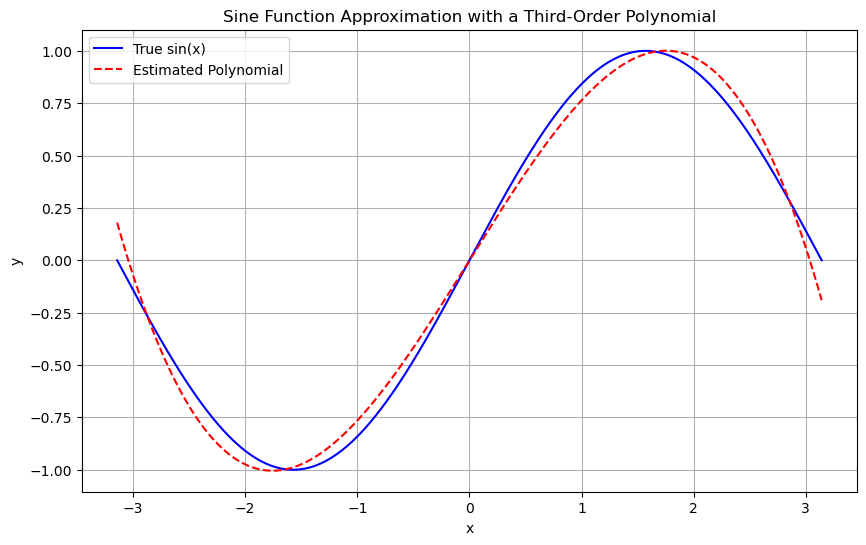

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), label='True sin(x)', color='blue')
plt.plot(x.numpy(), y_pred.detach().numpy(), label='Estimated Polynomial', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Function Approximation with a Third-Order Polynomial')
plt.legend()
plt.grid(True)
plt.show()

### Training a Third-Order Polynomial Network Using PyTorch's nn Package: A Sine Function Approximation Study


Neural network frameworks have evolved to provide increasingly sophisticated tools for model development while maintaining implementation simplicity. This study demonstrates the power of PyTorch's `nn` package by approximating the sine function through a third-order polynomial network over the domain [-π, π]. While PyTorch's autograd system provides fundamental automatic differentiation capabilities, the `nn` package elevates the implementation to a more structured level, offering pre-built modules that encapsulate neural network layers with trainable parameters.

The approach leverages the `nn` package's Module system, which manages the computational architecture and parameter updates. This abstraction allows us to focus on the network's architecture rather than the intricacies of gradient computation and weight management. By minimizing the squared Euclidean distance between the predicted values and the true sine function, we demonstrate how PyTorch's high-level abstractions facilitate the implementation of even simple mathematical approximations in a neural network framework.

This implementation serves as a practical example of how modern deep learning tools can be applied to classical function approximation problems, bridging the gap between traditional numerical methods and contemporary machine learning approaches.

In [ ]:
# Initial setup and Data Creation
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
# Preparing Input Features
p = torch.tensor([1, 2, 3]) # Creates powers [1,2,3] for x , x^2, x^3
xx = x.unsqueeze(-1).pow(p)

# Model Definition
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
# Loss Function
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6 # Learning Rate for gradient descent

# Training loop
for t in range(2000):
    # Forward pass
    y_pred = model(xx)
    # Loss computation
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    # Gradient reset
    model.zero_grad()
    # Backward pass
    loss.backward()
    # Parameter update
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')



99 669.3489990234375
199 446.00726318359375
299 298.2015380859375
399 200.37962341308594
499 135.6344451904297
599 92.77893829345703
699 64.4102783203125
799 45.63005828857422
899 33.196353912353516
999 24.963939666748047
1099 19.512611389160156
1199 15.902568817138672
1299 13.511615753173828
1399 11.927913665771484
1499 10.878762245178223
1599 10.183638572692871
1699 9.723052978515625
1799 9.417818069458008
1899 9.215495109558105
1999 9.081379890441895
Result: y = 0.003738794242963195 + 0.8413175344467163 x + -0.0006450045621022582 x^2 + -0.09113655239343643 x^3


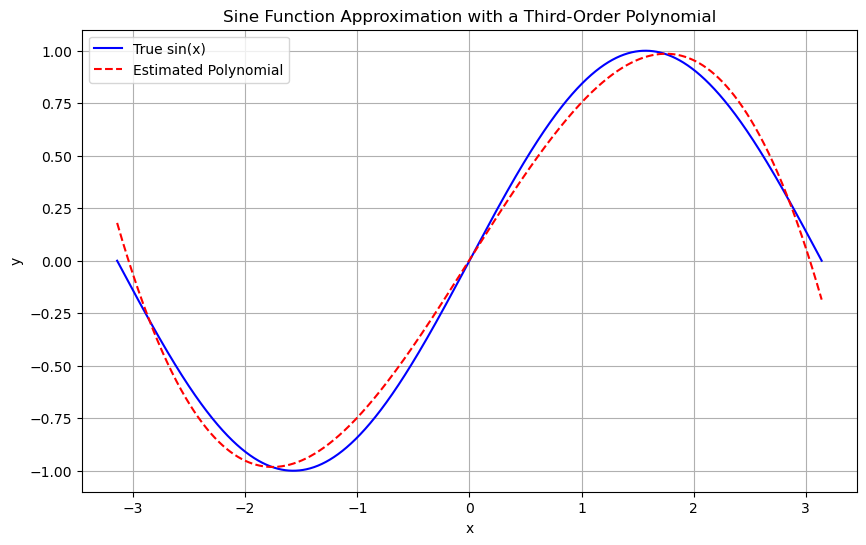

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), label='True sin(x)', color='blue')
plt.plot(x.numpy(), y_pred.detach().numpy(), label='Estimated Polynomial', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Function Approximation with a Third-Order Polynomial')
plt.legend()
plt.grid(True)
plt.show()

### Implementing a Custom PyTorch Module for Polynomial Regression


In the realm of machine learning, custom neural network modules are crucial for developing models beyond standard architectures. This tutorial explores the creation of a custom PyTorch module designed to fit a third-order polynomial to the function \( y = \sin(x) \) over the interval \(-\pi\) to \(\pi\). By minimizing the squared Euclidean distance between the predicted and actual values, this example underscores the flexibility and power of PyTorch's module subclassing. Such an approach is particularly beneficial when constructing models that require a more intricate structure than a simple sequence of existing modules. Through this exercise, we gain insights into both the practical aspects of PyTorch and the mathematical elegance of polynomial regression.

In [5]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        # The constructor (__init__) initializes four parameters \( a, b, c, \) and \( d \), which represent the coefficients of the polynomial \( y = a + bx + cx^2 + dx^3 \). These parameters are instances of torch.nn.Parameter, making them learnable during training.

        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        # The forward method computes the predicted \( y \) values for a given input \( x \) using the polynomial equation \( y = a + bx + cx^2 + dx^3 \).
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
# A tensor x is created using torch.linspace to generate 2,000 evenly spaced points between \(-\pi\) and \(\pi\). The tensor y is computed as the sine of x.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)


model = Polynomial3()
# The mean squared error loss (torch.nn.MSELoss) is used to measure the difference between the predicted values (y_pred) and the actual sine values (y).
# Stochastic Gradient Descent (SGD) optimizer is used to update the model parameters. The learning rate is set to \(1 \times 10^{-6}\).

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')


99 3172.326416015625
199 2101.650146484375
299 1393.385498046875
399 924.8463134765625
499 614.88330078125
599 409.8203430175781
699 274.1517028808594
799 184.390869140625
899 125.0008773803711
999 85.70429992675781
1099 59.70169448852539
1199 42.49482345581055
1299 31.108057022094727
1399 23.572221755981445
1499 18.584728240966797
1599 15.283544540405273
1699 13.098459243774414
1799 11.651957511901855
1899 10.694357872009277
1999 10.060346603393555
Result: y = -0.005709542892873287 + 0.8228697180747986 x + 0.000984990387223661 x^2 + -0.08851251751184464 x^3


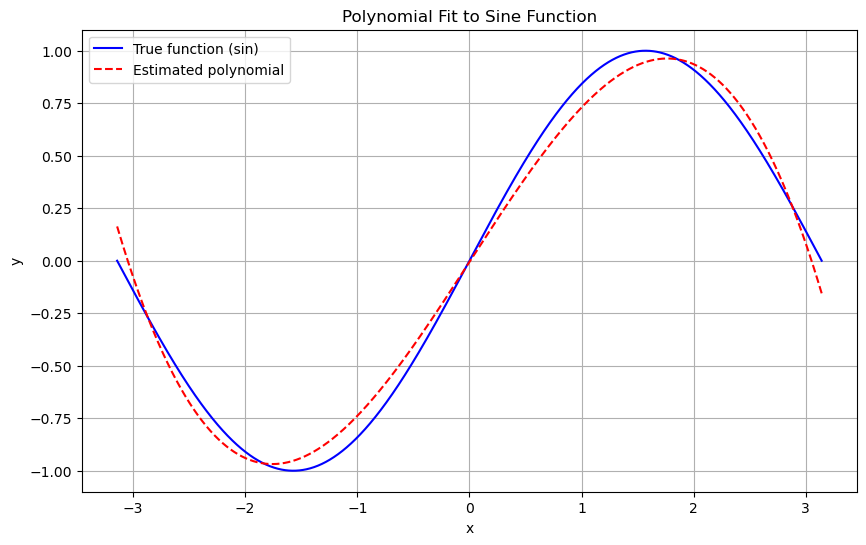

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), label='True function (sin)', color='blue')
plt.plot(x.numpy(), y_pred.detach().numpy(), label='Estimated polynomial', color='red', linestyle='--')
plt.title('Polynomial Fit to Sine Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### Dynamic Polynomial Regression with Control Flow and Weight Sharing in PyTorch

PyTorch's dynamic computation graph offers unparalleled flexibility in model design, enabling the implementation of complex architectures with fluid control flow and weight sharing. In this tutorial, we explore these capabilities by constructing an unconventional model: a dynamic polynomial regressor that randomly selects its order between four and five on each forward pass. This model demonstrates how to leverage PyTorch's dynamic graph to reuse weights across different polynomial terms, thereby illustrating advanced techniques in neural network construction. By integrating stochastic behavior and shared parameters, we highlight the adaptability and power of PyTorch for innovative machine learning applications.

In [ ]:
import random
import torch
import math


class DynamicNet(torch.nn.Module):
# Define a new class DynamicNet, which extends torch.nn.Module. This class represents a neural network model that can dynamically change its structure during each forward pass.
    def __init__(self):
        # The constructor (__init__) initializes five parameters (a, b, c, d, e) as torch.nn.Parameter objects. These parameters are the coefficients of the polynomial and will be optimized during training. torch.randn(()) initializes them with random values from a normal distribution.

        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        # The forward method computes the predicted y values for a given input x using a polynomial equation. The equation is defined as y = a + bx + cx^2 + dx^3 + ex^4 + fx^5 + ... + gx^n, where n is a random integer between 4 and 6.
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        # The string method returns a string representation of the polynomial equation defined by the model's parameters.
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# The mean squared error loss (torch.nn.MSELoss) is used to measure the difference between the predicted values (y_pred) and the actual sine values (y).
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

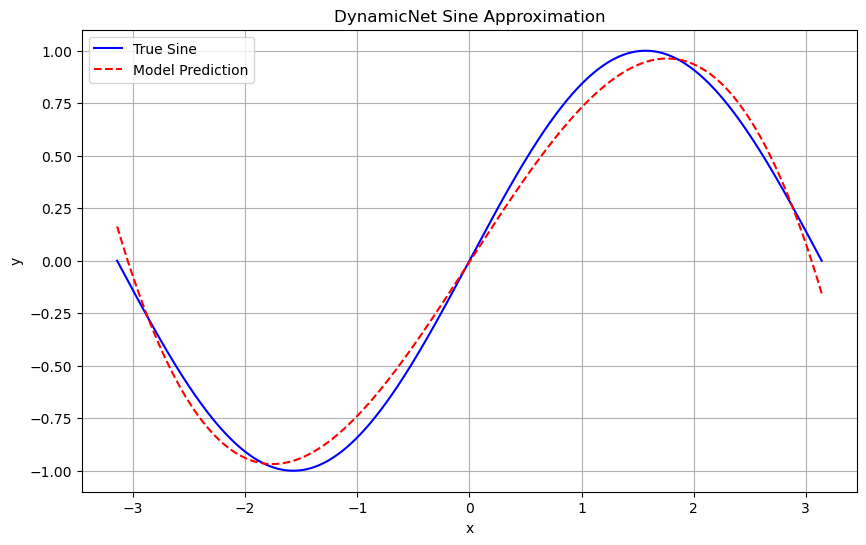

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x.detach().numpy(), y.detach().numpy(), label='True Sine', color='blue')
plt.plot(x.detach().numpy(), y_pred.detach().numpy(), label='Model Prediction', color='red', linestyle='--')
plt.title('DynamicNet Sine Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
